# TextBlob

### Run from this cell below until Vader for TextBlob experiments.

In [148]:
# Import all needed packages for loading data and running sentiment analysis
import pygsheets
import pandas as pd
import numpy as np
import json
from markdown import markdown
from bs4 import BeautifulSoup
from textblob import TextBlob
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support

## Load the labeled data from the Google Drive into a Pandas dataframe

In [ ]:
# Access the sheets and get the commit sheet (uncomment)
# Either change the service_file with your personal file, or use the local version of the CSV document.

# gc = pygsheets.authorize(service_file='commitevalutaion-6a3c4370bf89.json')
# sheets = gc.open_by_url("https://docs.google.com/spreadsheets/d/1OYsymuoRJGAXTHQImI0ycbN2NQhsxSkqlj-W-PEHRvw/edit#gid=1782607577")
# commit_sheet = sheets[1]

# get a dictionary of the tables
# data_dic = commit_sheet.get_all_records()

# pandas_df = pd.DataFrame(data=data_dic)

In [ ]:
# Alternatively, load the data from a local CSV file.
# If you use the code block above, comment this one out.

pandas_df = pd.read_csv("Issue Analysis.csv")

In [ ]:
issues_df = pandas_df[pandas_df["label"].str.contains("cost-")]
issues_df  # Pandas dataframe with cost-related entries

In [150]:
# Loading the original json for the complete body
with open('terraform_issues_updated.json', 'r') as f:
  original = json.load(f)

# Filter the title and body of the issues/PRs
issue_bodies = []
for repo in original["repositories"]:
    # For each issue in the repository
    for issue in repo["issues"]:
        for index, row in issues_df.iterrows():
            if issue["html_url"] == row["html_url"]:
                row["body"] = ""
                # Merge title, body and comments and save them into the old body field.
                if issue["title"] is not None:
                    row["body"] += issue["title"]
                if issue["body"] is not None:
                    row["body"] += "\n" + issue["body"]
                for comment in issue['comments_data']:
                    row["body"] += "\n" + comment["body"]
issues_df

,html_url,title,body,keyword,label,,sentiment,102
15,https://github.com/coreos/tectonic-installer/i...,Terraform Modules,Terraform Modules\nFEATURE REQUEST\r\n\r\nFirs...,pay,cost-awareness-billing_mode,They are wondering if it's possible to remove ...,Negative,
19,https://github.com/coreos/tectonic-installer/i...,Add Spotinst integration for worker nodes as a...,Add Spotinst integration for worker nodes as a...,cost,cost-saving-instance,,Positive,
21,https://github.com/ministryofjustice/modernisa...,Check billing for regional services configured...,Check billing for regional services configured...,bill,cost-awareness-billing_mode,,Positive,
23,https://github.com/ministryofjustice/modernisa...,Add S3 mount for Performance Hub,Add S3 mount for Performance Hub\n## User Stor...,cost,"cost-saving-provider, cost-awareness-provider",,Negative,
24,https://github.com/ministryofjustice/modernisa...,create a local sandbox transit gateway,create a local sandbox transit gateway\nAn iss...,cost,cost-increase-networking-NAT,,Negative,
...,...,...,...,...,...,...,...,...
840,https://github.com/openshift/okd/issues/619,OKD 4.5 in AWS - Cluster did not started after...,OKD 4.5 in AWS - Cluster did not started after...,cost,cost-saving-cluster,kindof,Positive,
855,https://github.com/ExpediaDotCom/haystack/issu...,[Feature Request] Log number of bytes sent and...,[Feature Request] Log number of bytes sent and...,cost,cost-saving-unknown,,Positive,
857,https://github.com/Guimove/terraform-aws-basti...,Route53 type CNAME?,Route53 type CNAME?\nSince rout53 is creating ...,cheap,cost-saving-domain,,Positive,
858,https://github.com/Guimove/terraform-aws-basti...,please consider using launch template in place...,please consider using launch template in place...,cost,cost-saving-domain,,Positive,


In [151]:
# Drop any extra columns that we have in the Spreadsheets that are not relevant cu sentiment analysis
issues_df.drop(labels=["keyword", "", "102", "label"], inplace=True, axis=1)

/opt/python/envs/default/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [152]:
issues_df

,html_url,title,body,sentiment
15,https://github.com/coreos/tectonic-installer/i...,Terraform Modules,Terraform Modules\nFEATURE REQUEST\r\n\r\nFirs...,Negative
19,https://github.com/coreos/tectonic-installer/i...,Add Spotinst integration for worker nodes as a...,Add Spotinst integration for worker nodes as a...,Positive
21,https://github.com/ministryofjustice/modernisa...,Check billing for regional services configured...,Check billing for regional services configured...,Positive
23,https://github.com/ministryofjustice/modernisa...,Add S3 mount for Performance Hub,Add S3 mount for Performance Hub\n## User Stor...,Negative
24,https://github.com/ministryofjustice/modernisa...,create a local sandbox transit gateway,create a local sandbox transit gateway\nAn iss...,Negative
...,...,...,...,...
840,https://github.com/openshift/okd/issues/619,OKD 4.5 in AWS - Cluster did not started after...,OKD 4.5 in AWS - Cluster did not started after...,Positive
855,https://github.com/ExpediaDotCom/haystack/issu...,[Feature Request] Log number of bytes sent and...,[Feature Request] Log number of bytes sent and...,Positive
857,https://github.com/Guimove/terraform-aws-basti...,Route53 type CNAME?,Route53 type CNAME?\nSince rout53 is creating ...,Positive
858,https://github.com/Guimove/terraform-aws-basti...,please consider using launch template in place...,please consider using launch template in place...,Positive


## Clean and prepare the dataframe for sentiment analysis

In [153]:
# Remove any markdown or HTML embeddings
for index, row in issues_df.iterrows():
    row["body"] = markdown(row["body"])
    row["body"] = ''.join(BeautifulSoup(row["body"]).findAll(text=True))

In [154]:
# Add new fields for the predicted sentiment
issues_df["Predicted SE"] = ""
issues_df

<ipython-input-154-d2e2d51889d8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  issues_df["Predicted SE"] = ""


,html_url,title,body,sentiment,Predicted SE
15,https://github.com/coreos/tectonic-installer/i...,Terraform Modules,Terraform Modules\nFEATURE REQUEST\nFirstly th...,Negative,
19,https://github.com/coreos/tectonic-installer/i...,Add Spotinst integration for worker nodes as a...,Add Spotinst integration for worker nodes as a...,Positive,
21,https://github.com/ministryofjustice/modernisa...,Check billing for regional services configured...,Check billing for regional services configured...,Positive,
23,https://github.com/ministryofjustice/modernisa...,Add S3 mount for Performance Hub,Add S3 mount for Performance Hub\nUser Story\n...,Negative,
24,https://github.com/ministryofjustice/modernisa...,create a local sandbox transit gateway,create a local sandbox transit gateway\nAn iss...,Negative,
...,...,...,...,...,...
840,https://github.com/openshift/okd/issues/619,OKD 4.5 in AWS - Cluster did not started after...,OKD 4.5 in AWS - Cluster did not started after...,Positive,
855,https://github.com/ExpediaDotCom/haystack/issu...,[Feature Request] Log number of bytes sent and...,[Feature Request] Log number of bytes sent and...,Positive,
857,https://github.com/Guimove/terraform-aws-basti...,Route53 type CNAME?,Route53 type CNAME?\nSince rout53 is creating ...,Positive,
858,https://github.com/Guimove/terraform-aws-basti...,please consider using launch template in place...,please consider using launch template in place...,Positive,


## Apply sentiment analysis using TextBlob and vizualize the results

In [155]:
# Loop through the dataframe and apply sentiment analysis on each body of text.
for index, row in issues_df.iterrows():
    polarity = TextBlob(row["body"]).sentiment.polarity

    # I use the default thresholds given in the TextBlob documentation
    if polarity < 0:
        sentiment =  "Negative"
    elif polarity == 0:
        sentiment = "Neutral"
    else:
        sentiment = "Positive"

    row["Predicted SE"] = sentiment

In [156]:
# Print the df
issues_df

,html_url,title,body,sentiment,Predicted SE
15,https://github.com/coreos/tectonic-installer/i...,Terraform Modules,Terraform Modules\nFEATURE REQUEST\nFirstly th...,Negative,Positive
19,https://github.com/coreos/tectonic-installer/i...,Add Spotinst integration for worker nodes as a...,Add Spotinst integration for worker nodes as a...,Positive,Positive
21,https://github.com/ministryofjustice/modernisa...,Check billing for regional services configured...,Check billing for regional services configured...,Positive,Negative
23,https://github.com/ministryofjustice/modernisa...,Add S3 mount for Performance Hub,Add S3 mount for Performance Hub\nUser Story\n...,Negative,Positive
24,https://github.com/ministryofjustice/modernisa...,create a local sandbox transit gateway,create a local sandbox transit gateway\nAn iss...,Negative,Negative
...,...,...,...,...,...
840,https://github.com/openshift/okd/issues/619,OKD 4.5 in AWS - Cluster did not started after...,OKD 4.5 in AWS - Cluster did not started after...,Positive,Negative
855,https://github.com/ExpediaDotCom/haystack/issu...,[Feature Request] Log number of bytes sent and...,[Feature Request] Log number of bytes sent and...,Positive,Positive
857,https://github.com/Guimove/terraform-aws-basti...,Route53 type CNAME?,Route53 type CNAME?\nSince rout53 is creating ...,Positive,Positive
858,https://github.com/Guimove/terraform-aws-basti...,please consider using launch template in place...,please consider using launch template in place...,Positive,Negative


In [157]:
# Filter only the entries that were used for sentiment analysis. It should be 100.
issues_df[issues_df["sentiment"] != ""]

,html_url,title,body,sentiment,Predicted SE
15,https://github.com/coreos/tectonic-installer/i...,Terraform Modules,Terraform Modules\nFEATURE REQUEST\nFirstly th...,Negative,Positive
19,https://github.com/coreos/tectonic-installer/i...,Add Spotinst integration for worker nodes as a...,Add Spotinst integration for worker nodes as a...,Positive,Positive
21,https://github.com/ministryofjustice/modernisa...,Check billing for regional services configured...,Check billing for regional services configured...,Positive,Negative
23,https://github.com/ministryofjustice/modernisa...,Add S3 mount for Performance Hub,Add S3 mount for Performance Hub\nUser Story\n...,Negative,Positive
24,https://github.com/ministryofjustice/modernisa...,create a local sandbox transit gateway,create a local sandbox transit gateway\nAn iss...,Negative,Negative
...,...,...,...,...,...
840,https://github.com/openshift/okd/issues/619,OKD 4.5 in AWS - Cluster did not started after...,OKD 4.5 in AWS - Cluster did not started after...,Positive,Negative
855,https://github.com/ExpediaDotCom/haystack/issu...,[Feature Request] Log number of bytes sent and...,[Feature Request] Log number of bytes sent and...,Positive,Positive
857,https://github.com/Guimove/terraform-aws-basti...,Route53 type CNAME?,Route53 type CNAME?\nSince rout53 is creating ...,Positive,Positive
858,https://github.com/Guimove/terraform-aws-basti...,please consider using launch template in place...,please consider using launch template in place...,Positive,Negative


In [158]:
# Build 2 arrays of the expected and predicted sentiment for confusion matrix.
expected = []
predicted = []
for index, row in issues_df.iterrows():
    if row["sentiment"]:
        expected.append(row["sentiment"])
        predicted.append(row["Predicted SE"])

In [159]:
# Print the confusion matrix
results = confusion_matrix(expected, predicted, labels=["Negative", "Neutral", "Positive"])
print(results)

[[ 6  2 23]
 [ 4  2 17]
 [10  3 33]]


In [160]:
# Print accuracy.
from sklearn.metrics import accuracy_score
print(accuracy_score(expected, predicted))

0.41


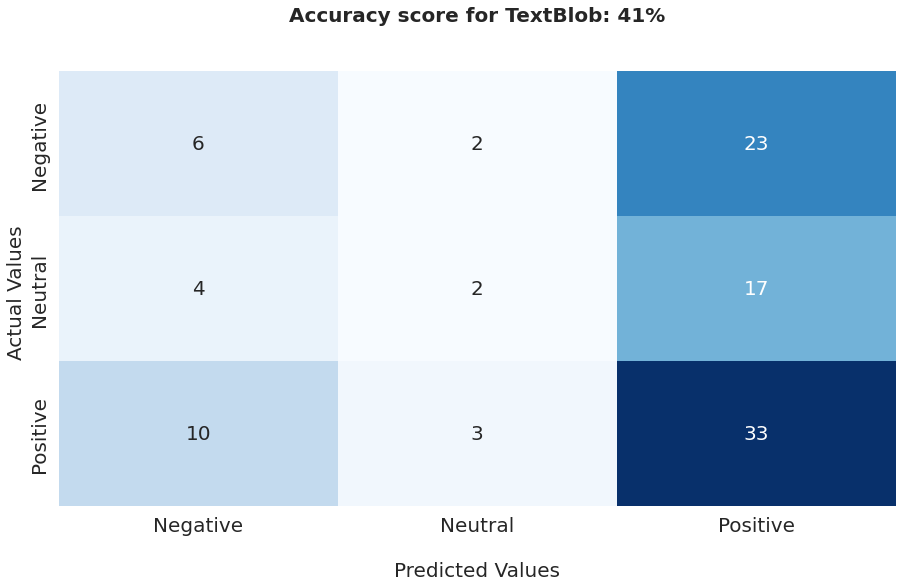

In [161]:
# Vizualize the confusion matrix and accuracy using seaborn. Saves the graph at the end as a PNG.

import seaborn as sns

sns.set(rc = {'figure.figsize':(15,8)})

ax = sns.heatmap(results, annot=True, cmap='Blues', cbar = False, annot_kws={"size": 20})

ax.set_title(f'Accuracy score for TextBlob: {int(accuracy_score(expected, predicted) * 100)}%\n\n', fontsize=20, weight='bold')
ax.set_xlabel('\nPredicted Values', fontsize = 20)
ax.set_ylabel('Actual Values ', fontsize = 20)

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Negative','Neutral', 'Positive'], fontsize = 20)
ax.yaxis.set_ticklabels(['Negative','Neutral', 'Positive'], fontsize = 20)
figure = ax.get_figure()

figure.savefig('TextBlob-matrix.png', bbox_inches='tight')

# Vader

### Run from this code block below for the Vader experiments.

In [162]:
import pygsheets
import pandas as pd
import json
from markdown import markdown
from bs4 import BeautifulSoup
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## Load the labeled data from the Google Drive into a Pandas dataframe

In [163]:
# access the sheets and get the commit sheet

# Either change the service_file with your personal file, or use the local version of the CSV document.
gc = pygsheets.authorize(service_file='commitevalutaion-6a3c4370bf89.json')
sheets = gc.open_by_url("https://docs.google.com/spreadsheets/d/1OYsymuoRJGAXTHQImI0ycbN2NQhsxSkqlj-W-PEHRvw/edit#gid=1782607577")
commit_sheet = sheets[1]

# get a dictionary of the tables
data_dic = commit_sheet.get_all_records()

pandas_df = pd.DataFrame(data=data_dic)
issues_df = pandas_df[pandas_df["label"].str.contains("cost-")]
issues_df

,html_url,title,body,keyword,label,,sentiment,102
15,https://github.com/coreos/tectonic-installer/i...,Terraform Modules,"identity, prometheus, heapster, and other feat...",pay,cost-awareness-billing_mode,They are wondering if it's possible to remove ...,Negative,
19,https://github.com/coreos/tectonic-installer/i...,Add Spotinst integration for worker nodes as a...,s Spot Instance market](https://aws.amazon.com...,cost,cost-saving-instance,,Positive,
21,https://github.com/ministryofjustice/modernisa...,Check billing for regional services configured...,Check billing for regional services configured...,bill,cost-awareness-billing_mode,,Positive,
23,https://github.com/ministryofjustice/modernisa...,Add S3 mount for Performance Hub,or one can be created specifically for managin...,cost,"cost-saving-provider, cost-awareness-provider",,Negative,
24,https://github.com/ministryofjustice/modernisa...,create a local sandbox transit gateway,the default route on Mod Plaformform is used f...,cost,cost-increase-networking-NAT,,Negative,
...,...,...,...,...,...,...,...,...
840,https://github.com/openshift/okd/issues/619,OKD 4.5 in AWS - Cluster did not started after...,4.5.0-0.okd-2020-10-15-235428 To save the cost...,cost,cost-saving-cluster,kindof,Positive,
855,https://github.com/ExpediaDotCom/haystack/issu...,[Feature Request] Log number of bytes sent and...,more we increase the performance of our servic...,cost,cost-saving-unknown,,Positive,
857,https://github.com/Guimove/terraform-aws-basti...,Route53 type CNAME?,bastion elb. Maybe type 'A' with alias should ...,cheap,cost-saving-domain,,Positive,
858,https://github.com/Guimove/terraform-aws-basti...,please consider using launch template in place...,either with an autoscaling group behind nlb or...,cost,cost-saving-domain,,Positive,


In [164]:
# Loading the original json for the complete body
with open('terraform_issues_updated.json', 'r') as f:
  original = json.load(f)

# Filter the title and body of the issues/PRs
issue_bodies = []
for repo in original["repositories"]:
    for issue in repo["issues"]:
        for index, row in issues_df.iterrows():
            if issue["html_url"] == row["html_url"]:
                row["body"] = ""
                if issue["title"] is not None:
                    row["body"] += issue["title"]
                if issue["body"] is not None:
                    row["body"] += "\n" + issue["body"]
                for comment in issue['comments_data']:
                    row["body"] += "\n" + comment["body"]
issues_df

,html_url,title,body,keyword,label,,sentiment,102
15,https://github.com/coreos/tectonic-installer/i...,Terraform Modules,Terraform Modules\nFEATURE REQUEST\r\n\r\nFirs...,pay,cost-awareness-billing_mode,They are wondering if it's possible to remove ...,Negative,
19,https://github.com/coreos/tectonic-installer/i...,Add Spotinst integration for worker nodes as a...,Add Spotinst integration for worker nodes as a...,cost,cost-saving-instance,,Positive,
21,https://github.com/ministryofjustice/modernisa...,Check billing for regional services configured...,Check billing for regional services configured...,bill,cost-awareness-billing_mode,,Positive,
23,https://github.com/ministryofjustice/modernisa...,Add S3 mount for Performance Hub,Add S3 mount for Performance Hub\n## User Stor...,cost,"cost-saving-provider, cost-awareness-provider",,Negative,
24,https://github.com/ministryofjustice/modernisa...,create a local sandbox transit gateway,create a local sandbox transit gateway\nAn iss...,cost,cost-increase-networking-NAT,,Negative,
...,...,...,...,...,...,...,...,...
840,https://github.com/openshift/okd/issues/619,OKD 4.5 in AWS - Cluster did not started after...,OKD 4.5 in AWS - Cluster did not started after...,cost,cost-saving-cluster,kindof,Positive,
855,https://github.com/ExpediaDotCom/haystack/issu...,[Feature Request] Log number of bytes sent and...,[Feature Request] Log number of bytes sent and...,cost,cost-saving-unknown,,Positive,
857,https://github.com/Guimove/terraform-aws-basti...,Route53 type CNAME?,Route53 type CNAME?\nSince rout53 is creating ...,cheap,cost-saving-domain,,Positive,
858,https://github.com/Guimove/terraform-aws-basti...,please consider using launch template in place...,please consider using launch template in place...,cost,cost-saving-domain,,Positive,


In [165]:
issues_df.drop(labels=["keyword", "", "102", "label"], inplace=True, axis=1)

/opt/python/envs/default/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [166]:
issues_df

,html_url,title,body,sentiment
15,https://github.com/coreos/tectonic-installer/i...,Terraform Modules,Terraform Modules\nFEATURE REQUEST\r\n\r\nFirs...,Negative
19,https://github.com/coreos/tectonic-installer/i...,Add Spotinst integration for worker nodes as a...,Add Spotinst integration for worker nodes as a...,Positive
21,https://github.com/ministryofjustice/modernisa...,Check billing for regional services configured...,Check billing for regional services configured...,Positive
23,https://github.com/ministryofjustice/modernisa...,Add S3 mount for Performance Hub,Add S3 mount for Performance Hub\n## User Stor...,Negative
24,https://github.com/ministryofjustice/modernisa...,create a local sandbox transit gateway,create a local sandbox transit gateway\nAn iss...,Negative
...,...,...,...,...
840,https://github.com/openshift/okd/issues/619,OKD 4.5 in AWS - Cluster did not started after...,OKD 4.5 in AWS - Cluster did not started after...,Positive
855,https://github.com/ExpediaDotCom/haystack/issu...,[Feature Request] Log number of bytes sent and...,[Feature Request] Log number of bytes sent and...,Positive
857,https://github.com/Guimove/terraform-aws-basti...,Route53 type CNAME?,Route53 type CNAME?\nSince rout53 is creating ...,Positive
858,https://github.com/Guimove/terraform-aws-basti...,please consider using launch template in place...,please consider using launch template in place...,Positive


## Clean and prepare the dataframe for sentiment analysis

In [167]:
# Remove Markdown and HTML from text
for index, row in issues_df.iterrows():
    row["body"] = markdown(row["body"])
    row["body"] = ''.join(BeautifulSoup(row["body"]).findAll(text=True))

In [168]:
issues_df["Predicted SE"] = ""
issues_df

<ipython-input-168-8cc7fc56b683>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  issues_df["Predicted SE"] = ""


,html_url,title,body,sentiment,Predicted SE
15,https://github.com/coreos/tectonic-installer/i...,Terraform Modules,Terraform Modules\nFEATURE REQUEST\nFirstly th...,Negative,
19,https://github.com/coreos/tectonic-installer/i...,Add Spotinst integration for worker nodes as a...,Add Spotinst integration for worker nodes as a...,Positive,
21,https://github.com/ministryofjustice/modernisa...,Check billing for regional services configured...,Check billing for regional services configured...,Positive,
23,https://github.com/ministryofjustice/modernisa...,Add S3 mount for Performance Hub,Add S3 mount for Performance Hub\nUser Story\n...,Negative,
24,https://github.com/ministryofjustice/modernisa...,create a local sandbox transit gateway,create a local sandbox transit gateway\nAn iss...,Negative,
...,...,...,...,...,...
840,https://github.com/openshift/okd/issues/619,OKD 4.5 in AWS - Cluster did not started after...,OKD 4.5 in AWS - Cluster did not started after...,Positive,
855,https://github.com/ExpediaDotCom/haystack/issu...,[Feature Request] Log number of bytes sent and...,[Feature Request] Log number of bytes sent and...,Positive,
857,https://github.com/Guimove/terraform-aws-basti...,Route53 type CNAME?,Route53 type CNAME?\nSince rout53 is creating ...,Positive,
858,https://github.com/Guimove/terraform-aws-basti...,please consider using launch template in place...,please consider using launch template in place...,Positive,


In [169]:
analyzer = SentimentIntensityAnalyzer()
for index, row in issues_df.iterrows():
    sentiment_dict = analyzer.polarity_scores(row["body"])

    if sentiment_dict['compound'] >= 0.05 :
        overall_sentiment = "Positive"

    elif sentiment_dict['compound'] <= - 0.05 :
        overall_sentiment = "Negative"

    else :
        overall_sentiment = "Neutral"

    row["Predicted SE"] = overall_sentiment

In [170]:
issues_df

,html_url,title,body,sentiment,Predicted SE
15,https://github.com/coreos/tectonic-installer/i...,Terraform Modules,Terraform Modules\nFEATURE REQUEST\nFirstly th...,Negative,Positive
19,https://github.com/coreos/tectonic-installer/i...,Add Spotinst integration for worker nodes as a...,Add Spotinst integration for worker nodes as a...,Positive,Positive
21,https://github.com/ministryofjustice/modernisa...,Check billing for regional services configured...,Check billing for regional services configured...,Positive,Negative
23,https://github.com/ministryofjustice/modernisa...,Add S3 mount for Performance Hub,Add S3 mount for Performance Hub\nUser Story\n...,Negative,Positive
24,https://github.com/ministryofjustice/modernisa...,create a local sandbox transit gateway,create a local sandbox transit gateway\nAn iss...,Negative,Positive
...,...,...,...,...,...
840,https://github.com/openshift/okd/issues/619,OKD 4.5 in AWS - Cluster did not started after...,OKD 4.5 in AWS - Cluster did not started after...,Positive,Negative
855,https://github.com/ExpediaDotCom/haystack/issu...,[Feature Request] Log number of bytes sent and...,[Feature Request] Log number of bytes sent and...,Positive,Positive
857,https://github.com/Guimove/terraform-aws-basti...,Route53 type CNAME?,Route53 type CNAME?\nSince rout53 is creating ...,Positive,Positive
858,https://github.com/Guimove/terraform-aws-basti...,please consider using launch template in place...,please consider using launch template in place...,Positive,Positive


In [173]:
# Check only the issues that have been predicted.
issues_df[issues_df["sentiment"] != ""]

,html_url,title,body,sentiment,Predicted SE
15,https://github.com/coreos/tectonic-installer/i...,Terraform Modules,Terraform Modules\nFEATURE REQUEST\nFirstly th...,Negative,Positive
19,https://github.com/coreos/tectonic-installer/i...,Add Spotinst integration for worker nodes as a...,Add Spotinst integration for worker nodes as a...,Positive,Positive
21,https://github.com/ministryofjustice/modernisa...,Check billing for regional services configured...,Check billing for regional services configured...,Positive,Negative
23,https://github.com/ministryofjustice/modernisa...,Add S3 mount for Performance Hub,Add S3 mount for Performance Hub\nUser Story\n...,Negative,Positive
24,https://github.com/ministryofjustice/modernisa...,create a local sandbox transit gateway,create a local sandbox transit gateway\nAn iss...,Negative,Positive
...,...,...,...,...,...
840,https://github.com/openshift/okd/issues/619,OKD 4.5 in AWS - Cluster did not started after...,OKD 4.5 in AWS - Cluster did not started after...,Positive,Negative
855,https://github.com/ExpediaDotCom/haystack/issu...,[Feature Request] Log number of bytes sent and...,[Feature Request] Log number of bytes sent and...,Positive,Positive
857,https://github.com/Guimove/terraform-aws-basti...,Route53 type CNAME?,Route53 type CNAME?\nSince rout53 is creating ...,Positive,Positive
858,https://github.com/Guimove/terraform-aws-basti...,please consider using launch template in place...,please consider using launch template in place...,Positive,Positive


In [174]:
# Needed to generate a confusion matrix
expected = []
predicted = []
for index, row in issues_df.iterrows():
    if row["sentiment"]:
        expected.append(row["sentiment"])
        predicted.append(row["Predicted SE"])

In [175]:
results = confusion_matrix(expected, predicted, labels=["Negative", "Neutral", "Positive"])
print(results)

[[ 3  0 28]
 [ 4  2 17]
 [ 7  3 36]]


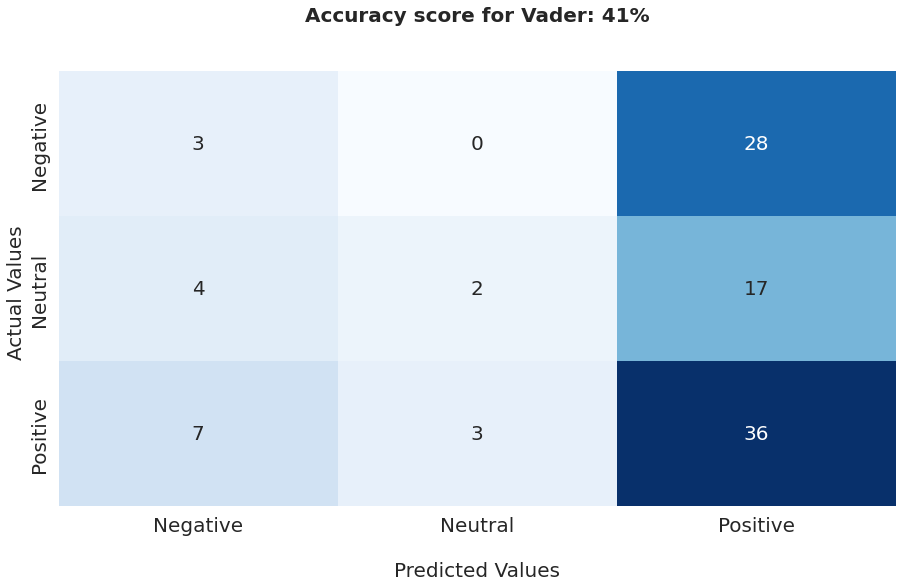

In [176]:
# Visualize the confusion matrices
import seaborn as sns

sns.set(rc = {'figure.figsize':(15,8)})

ax = sns.heatmap(results, annot=True, cmap='Blues', cbar = False, annot_kws={"size": 20})

ax.set_title(f'Accuracy score for Vader: {int(accuracy_score(expected, predicted) * 100)}%\n\n', fontsize=20, weight='bold')
ax.set_xlabel('\nPredicted Values', fontsize = 20)
ax.set_ylabel('Actual Values ', fontsize = 20)

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Negative','Neutral', 'Positive'], fontsize = 20)
ax.yaxis.set_ticklabels(['Negative','Neutral', 'Positive'], fontsize = 20)
figure = ax.get_figure()

figure.savefig('Vader-matrix.png', bbox_inches='tight')

# Stanza

### Run from this code block below for only the Stanza experiments.

In [177]:
import pygsheets
import pandas as pd
import json
from markdown import markdown
from bs4 import BeautifulSoup
import stanza
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## Load the labeled data from the Google Drive into a Pandas dataframe

In [178]:
# access the sheets and get the commit sheet

# Either change the service_file with your personal file, or use the local version of the CSV document.
gc = pygsheets.authorize(service_file='commitevalutaion-6a3c4370bf89.json')
sheets = gc.open_by_url("https://docs.google.com/spreadsheets/d/1OYsymuoRJGAXTHQImI0ycbN2NQhsxSkqlj-W-PEHRvw/edit#gid=1782607577")
commit_sheet = sheets[1]

# get a dictionary of the tables
data_dic = commit_sheet.get_all_records()

pandas_df = pd.DataFrame(data=data_dic)
issues_df = pandas_df[pandas_df["label"].str.contains("cost-")]
issues_df

,html_url,title,body,keyword,label,,sentiment,102
15,https://github.com/coreos/tectonic-installer/i...,Terraform Modules,"identity, prometheus, heapster, and other feat...",pay,cost-awareness-billing_mode,They are wondering if it's possible to remove ...,Negative,
19,https://github.com/coreos/tectonic-installer/i...,Add Spotinst integration for worker nodes as a...,s Spot Instance market](https://aws.amazon.com...,cost,cost-saving-instance,,Positive,
21,https://github.com/ministryofjustice/modernisa...,Check billing for regional services configured...,Check billing for regional services configured...,bill,cost-awareness-billing_mode,,Positive,
23,https://github.com/ministryofjustice/modernisa...,Add S3 mount for Performance Hub,or one can be created specifically for managin...,cost,"cost-saving-provider, cost-awareness-provider",,Negative,
24,https://github.com/ministryofjustice/modernisa...,create a local sandbox transit gateway,the default route on Mod Plaformform is used f...,cost,cost-increase-networking-NAT,,Negative,
...,...,...,...,...,...,...,...,...
840,https://github.com/openshift/okd/issues/619,OKD 4.5 in AWS - Cluster did not started after...,4.5.0-0.okd-2020-10-15-235428 To save the cost...,cost,cost-saving-cluster,kindof,Positive,
855,https://github.com/ExpediaDotCom/haystack/issu...,[Feature Request] Log number of bytes sent and...,more we increase the performance of our servic...,cost,cost-saving-unknown,,Positive,
857,https://github.com/Guimove/terraform-aws-basti...,Route53 type CNAME?,bastion elb. Maybe type 'A' with alias should ...,cheap,cost-saving-domain,,Positive,
858,https://github.com/Guimove/terraform-aws-basti...,please consider using launch template in place...,either with an autoscaling group behind nlb or...,cost,cost-saving-domain,,Positive,


In [179]:
# Loading the original json for the complete body
with open('terraform_issues_updated.json', 'r') as f:
  original = json.load(f)

# Filter the title and body of the issues/PRs
issue_bodies = []
for repo in original["repositories"]:
    for issue in repo["issues"]:
        for index, row in issues_df.iterrows():
            if issue["html_url"] == row["html_url"]:
                row["body"] = ""
                if issue["title"] is not None:
                    row["body"] += issue["title"]
                if issue["body"] is not None:
                    row["body"] += "\n" + issue["body"]
                for comment in issue['comments_data']:
                    row["body"] += "\n" + comment["body"]
issues_df

,html_url,title,body,keyword,label,,sentiment,102
15,https://github.com/coreos/tectonic-installer/i...,Terraform Modules,Terraform Modules\nFEATURE REQUEST\r\n\r\nFirs...,pay,cost-awareness-billing_mode,They are wondering if it's possible to remove ...,Negative,
19,https://github.com/coreos/tectonic-installer/i...,Add Spotinst integration for worker nodes as a...,Add Spotinst integration for worker nodes as a...,cost,cost-saving-instance,,Positive,
21,https://github.com/ministryofjustice/modernisa...,Check billing for regional services configured...,Check billing for regional services configured...,bill,cost-awareness-billing_mode,,Positive,
23,https://github.com/ministryofjustice/modernisa...,Add S3 mount for Performance Hub,Add S3 mount for Performance Hub\n## User Stor...,cost,"cost-saving-provider, cost-awareness-provider",,Negative,
24,https://github.com/ministryofjustice/modernisa...,create a local sandbox transit gateway,create a local sandbox transit gateway\nAn iss...,cost,cost-increase-networking-NAT,,Negative,
...,...,...,...,...,...,...,...,...
840,https://github.com/openshift/okd/issues/619,OKD 4.5 in AWS - Cluster did not started after...,OKD 4.5 in AWS - Cluster did not started after...,cost,cost-saving-cluster,kindof,Positive,
855,https://github.com/ExpediaDotCom/haystack/issu...,[Feature Request] Log number of bytes sent and...,[Feature Request] Log number of bytes sent and...,cost,cost-saving-unknown,,Positive,
857,https://github.com/Guimove/terraform-aws-basti...,Route53 type CNAME?,Route53 type CNAME?\nSince rout53 is creating ...,cheap,cost-saving-domain,,Positive,
858,https://github.com/Guimove/terraform-aws-basti...,please consider using launch template in place...,please consider using launch template in place...,cost,cost-saving-domain,,Positive,


In [180]:
issues_df.drop(labels=["keyword", "", "102", "label"], inplace=True, axis=1)

/opt/python/envs/default/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [181]:
issues_df

,html_url,title,body,sentiment
15,https://github.com/coreos/tectonic-installer/i...,Terraform Modules,Terraform Modules\nFEATURE REQUEST\r\n\r\nFirs...,Negative
19,https://github.com/coreos/tectonic-installer/i...,Add Spotinst integration for worker nodes as a...,Add Spotinst integration for worker nodes as a...,Positive
21,https://github.com/ministryofjustice/modernisa...,Check billing for regional services configured...,Check billing for regional services configured...,Positive
23,https://github.com/ministryofjustice/modernisa...,Add S3 mount for Performance Hub,Add S3 mount for Performance Hub\n## User Stor...,Negative
24,https://github.com/ministryofjustice/modernisa...,create a local sandbox transit gateway,create a local sandbox transit gateway\nAn iss...,Negative
...,...,...,...,...
840,https://github.com/openshift/okd/issues/619,OKD 4.5 in AWS - Cluster did not started after...,OKD 4.5 in AWS - Cluster did not started after...,Positive
855,https://github.com/ExpediaDotCom/haystack/issu...,[Feature Request] Log number of bytes sent and...,[Feature Request] Log number of bytes sent and...,Positive
857,https://github.com/Guimove/terraform-aws-basti...,Route53 type CNAME?,Route53 type CNAME?\nSince rout53 is creating ...,Positive
858,https://github.com/Guimove/terraform-aws-basti...,please consider using launch template in place...,please consider using launch template in place...,Positive


## Clean and prepare the dataframe for sentiment analysis

In [182]:
# Clear Markdown code and HTML code
for index, row in issues_df.iterrows():
    row["body"] = markdown(row["body"])
    row["body"] = ''.join(BeautifulSoup(row["body"]).findAll(text=True))

In [183]:
issues_df["Predicted SE"] = ""
issues_df

<ipython-input-183-8cc7fc56b683>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  issues_df["Predicted SE"] = ""


,html_url,title,body,sentiment,Predicted SE
15,https://github.com/coreos/tectonic-installer/i...,Terraform Modules,Terraform Modules\nFEATURE REQUEST\nFirstly th...,Negative,
19,https://github.com/coreos/tectonic-installer/i...,Add Spotinst integration for worker nodes as a...,Add Spotinst integration for worker nodes as a...,Positive,
21,https://github.com/ministryofjustice/modernisa...,Check billing for regional services configured...,Check billing for regional services configured...,Positive,
23,https://github.com/ministryofjustice/modernisa...,Add S3 mount for Performance Hub,Add S3 mount for Performance Hub\nUser Story\n...,Negative,
24,https://github.com/ministryofjustice/modernisa...,create a local sandbox transit gateway,create a local sandbox transit gateway\nAn iss...,Negative,
...,...,...,...,...,...
840,https://github.com/openshift/okd/issues/619,OKD 4.5 in AWS - Cluster did not started after...,OKD 4.5 in AWS - Cluster did not started after...,Positive,
855,https://github.com/ExpediaDotCom/haystack/issu...,[Feature Request] Log number of bytes sent and...,[Feature Request] Log number of bytes sent and...,Positive,
857,https://github.com/Guimove/terraform-aws-basti...,Route53 type CNAME?,Route53 type CNAME?\nSince rout53 is creating ...,Positive,
858,https://github.com/Guimove/terraform-aws-basti...,please consider using launch template in place...,please consider using launch template in place...,Positive,


In [184]:
nlp = stanza.Pipeline(lang='en', processors='tokenize,sentiment')

for index, row in issues_df.iterrows():

    doc = nlp(row["body"])
    sentiment = 0
    size = len(doc.sentences)
    # To circumvent the way Stanza works, we add up the sentiment for all sentences in a document and divide by 
    # the number of sentences.
    for i, sentence in enumerate(doc.sentences):
        sentiment += sentence.sentiment

    sentiment = sentiment / size

    # Round to the closest integer so we can cast it to a sentiment.
    sentiment = round(sentiment, 0)

    if sentiment == 0:
        sa = "Negative"
    elif sentiment == 1:
        sa = "Neutral"
    else:
        sa = "Positive"

    row["Predicted SE"] = sa

2022-07-06 20:17:25 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| sentiment | sstplus  |

2022-07-06 20:17:25 INFO: Use device: cpu
2022-07-06 20:17:25 INFO: Loading: tokenize
2022-07-06 20:17:25 INFO: Loading: sentiment
2022-07-06 20:17:25 INFO: Done loading processors!


In [185]:
issues_df

,html_url,title,body,sentiment,Predicted SE
15,https://github.com/coreos/tectonic-installer/i...,Terraform Modules,Terraform Modules\nFEATURE REQUEST\nFirstly th...,Negative,Neutral
19,https://github.com/coreos/tectonic-installer/i...,Add Spotinst integration for worker nodes as a...,Add Spotinst integration for worker nodes as a...,Positive,Neutral
21,https://github.com/ministryofjustice/modernisa...,Check billing for regional services configured...,Check billing for regional services configured...,Positive,Negative
23,https://github.com/ministryofjustice/modernisa...,Add S3 mount for Performance Hub,Add S3 mount for Performance Hub\nUser Story\n...,Negative,Neutral
24,https://github.com/ministryofjustice/modernisa...,create a local sandbox transit gateway,create a local sandbox transit gateway\nAn iss...,Negative,Neutral
...,...,...,...,...,...
840,https://github.com/openshift/okd/issues/619,OKD 4.5 in AWS - Cluster did not started after...,OKD 4.5 in AWS - Cluster did not started after...,Positive,Neutral
855,https://github.com/ExpediaDotCom/haystack/issu...,[Feature Request] Log number of bytes sent and...,[Feature Request] Log number of bytes sent and...,Positive,Neutral
857,https://github.com/Guimove/terraform-aws-basti...,Route53 type CNAME?,Route53 type CNAME?\nSince rout53 is creating ...,Positive,Neutral
858,https://github.com/Guimove/terraform-aws-basti...,please consider using launch template in place...,please consider using launch template in place...,Positive,Neutral


In [188]:
issues_df[issues_df["sentiment"] != ""]

,html_url,title,body,sentiment,Predicted SE
15,https://github.com/coreos/tectonic-installer/i...,Terraform Modules,Terraform Modules\nFEATURE REQUEST\nFirstly th...,Negative,Neutral
19,https://github.com/coreos/tectonic-installer/i...,Add Spotinst integration for worker nodes as a...,Add Spotinst integration for worker nodes as a...,Positive,Neutral
21,https://github.com/ministryofjustice/modernisa...,Check billing for regional services configured...,Check billing for regional services configured...,Positive,Negative
23,https://github.com/ministryofjustice/modernisa...,Add S3 mount for Performance Hub,Add S3 mount for Performance Hub\nUser Story\n...,Negative,Neutral
24,https://github.com/ministryofjustice/modernisa...,create a local sandbox transit gateway,create a local sandbox transit gateway\nAn iss...,Negative,Neutral
...,...,...,...,...,...
840,https://github.com/openshift/okd/issues/619,OKD 4.5 in AWS - Cluster did not started after...,OKD 4.5 in AWS - Cluster did not started after...,Positive,Neutral
855,https://github.com/ExpediaDotCom/haystack/issu...,[Feature Request] Log number of bytes sent and...,[Feature Request] Log number of bytes sent and...,Positive,Neutral
857,https://github.com/Guimove/terraform-aws-basti...,Route53 type CNAME?,Route53 type CNAME?\nSince rout53 is creating ...,Positive,Neutral
858,https://github.com/Guimove/terraform-aws-basti...,please consider using launch template in place...,please consider using launch template in place...,Positive,Neutral


In [189]:
expected = []
predicted = []
for index, row in issues_df.iterrows():
    if row["sentiment"]:
        expected.append(row["sentiment"])
        predicted.append(row["Predicted SE"])

In [190]:
results = confusion_matrix(expected, predicted, labels=["Negative", "Neutral", "Positive"])
print(results)

[[ 7 24  0]
 [ 3 19  1]
 [ 5 41  0]]


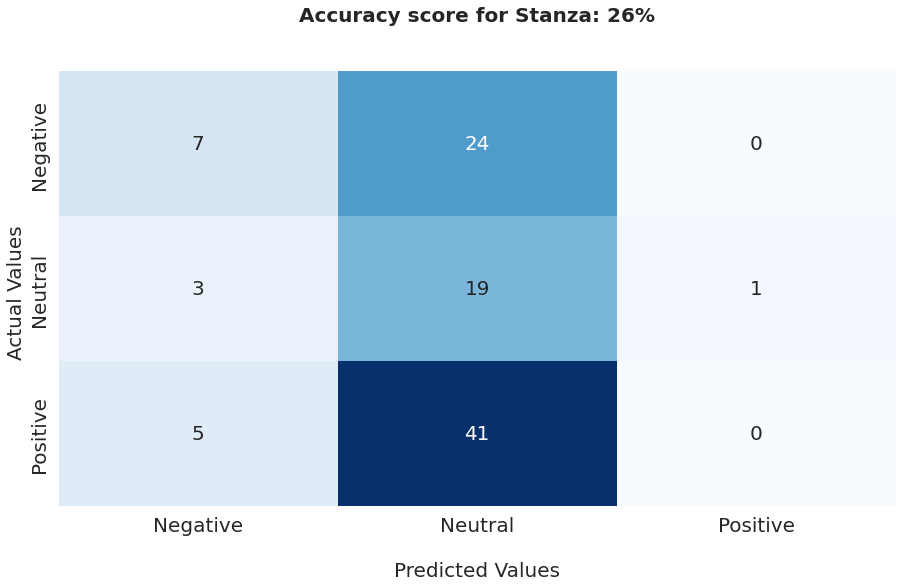

In [191]:
import seaborn as sns

sns.set(rc = {'figure.figsize':(15,8)})

ax = sns.heatmap(results, annot=True, cmap='Blues', cbar = False, annot_kws={"size": 20})

ax.set_title(f'Accuracy score for Stanza: {int(accuracy_score(expected, predicted) * 100)}%\n\n', fontsize=20, weight='bold')
ax.set_xlabel('\nPredicted Values', fontsize = 20)
ax.set_ylabel('Actual Values ', fontsize = 20)

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Negative','Neutral', 'Positive'], fontsize = 20)
ax.yaxis.set_ticklabels(['Negative','Neutral', 'Positive'], fontsize = 20)
figure = ax.get_figure()

figure.savefig('Stanza-matrix.png', bbox_inches='tight')